## Problem Statement:
### Develop a regression model to predict garment employee productivity. Accurate predictions will optimize workforce planning and enhance production efficiency.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
import plotly.express as px

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


ModuleNotFoundError: No module named 'plotly'

In [7]:

import sys
import os

from pathlib import Path

project_root = Path.cwd().parent.parent  # Adjust if needed
df = load_dataset("garments_worker_productivity.csv", folder="data/raw", base_path=project_root)


FileNotFoundError: [Errno 2] No such file or directory: '../../data/processed/raw/garments_worker_productivity.csv'

In [ ]:
df.head()

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

### 📊 Dataset Overview

The dataset contains **1197 rows** and **15 columns**, capturing various aspects of garment manufacturing productivity. Here's a summary of the key columns:

| Column                  | Description                          |
|-------------------------|--------------------------------------|
| `date`                 | Record date                          |
| `quarter`              | Quarter of the year (e.g., Q1, Q2)   |
| `department`           | Department name                      |
| `day`                  | Day of the week                      |
| `team`                 | Team number                          |
| `targeted_productivity`| Expected productivity                |
| `smv`                  | Standard Minute Value                |
| `wip`                  | Work in progress (has missing values)|
| `over_time`            | Overtime minutes                     |
| `incentive`            | Incentive amount                     |
| `idle_time`            | Minutes of idle time                 |
| `idle_men`             | Number of idle workers               |
| `no_of_style_change`   | Style changes per day                |
| `no_of_workers`        | Number of workers on the team        |
| `actual_productivity`  | Measured productivity                |

### 🛠 Notes:
- `wip` has missing values (691 non-null).
- Categorical columns like `date`, `quarter`, `department`, and `day` may need to be encoded.
- Numerical features dominate the dataset, making it suitable for machine learning workflows.


### Handling Missing Values

We impute missing values in the `wip` column using the **median** of the available values:

In [121]:
## Impute missing 'wip' with median
df['wip'] = df['wip'].fillna(df['wip'].median())


### checking null values

In [122]:
#checking for any existing null values
df.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [123]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1126.437761,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1397.653191,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,970.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1083.000000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


###  Productivity Over Time

We first convert the `date` column to `datetime` format for accurate time-based analysis:

Then, we plot the average actual_productivity over time:


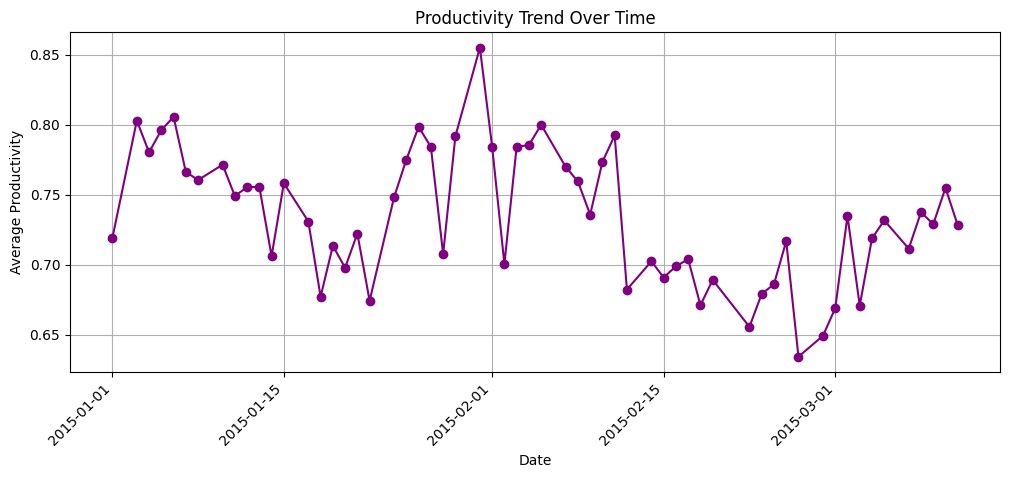

In [124]:
# Type Conversion of 'Date' column
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

# Time Series Plot of 'Productivity'
plt.figure(figsize=(12,5))
df.groupby('date')['actual_productivity'].mean().plot(marker='o', color='purple')
plt.title('Productivity Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average Productivity')
plt.xticks(rotation=45)
plt.grid(True)

### Productivity Trend Over Time

This time series plot shows how the average `actual_productivity` changes over the dataset's timeline.

**Key Points:**
- The x-axis represents the date (starting from January 2015).
- The y-axis shows the average productivity recorded on each day.
- The plot highlights some fluctuations and dips, particularly around mid-February and early March.
- There may be weekly or operational cycles affecting performance that could be explored further (e.g., team shifts, deadlines, resource availability).

This trend helps in understanding operational efficiency and identifying periods of unusually low or high productivity.


### Productivity Share by Day (Donut Chart)

This donut chart represents the average share of `actual_productivity` across different days of the week.

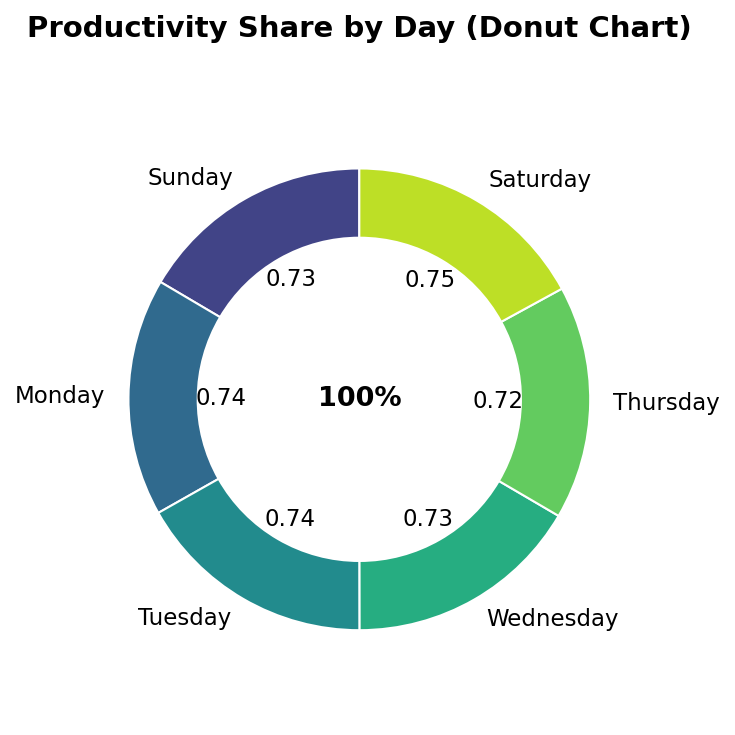

In [125]:
import matplotlib.pyplot as plt
import numpy as np

# Group and sort average productivity by day
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Saturday']
avg_by_day = df.groupby('day')['actual_productivity'].mean().reindex(day_order)

# Define color palette
colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(avg_by_day)))

# Create the donut chart
fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
wedges, texts, autotexts = ax.pie(
    avg_by_day,
    labels=day_order,
    autopct=lambda pct: f'{pct * avg_by_day.sum() / 100:.2f}',
    startangle=90,
    colors=colors,
    wedgeprops={'width': 0.3, 'edgecolor': 'white'},
    textprops={'fontsize': 11}
)

# Optional: add a center label (e.g., Total)
ax.text(0, 0, '100%', ha='center', va='center', fontsize=13, fontweight='bold')

# Final formatting
ax.set_title('Productivity Share by Day (Donut Chart)', fontsize=14, fontweight='bold', pad=20)
ax.axis('equal')  # Keeps it circular

plt.tight_layout()
plt.show()


### Average Productivity by Day of the Week

This donut chart visualizes the **average `actual_productivity`** for each day recorded in the dataset.

**Key Observations:**
- Productivity is fairly consistent across days, with values ranging from **0.72 to 0.75**.
- **Saturday** shows the highest average productivity (~0.75), while **Thursday** has the lowest (~0.72).
- The differences are subtle, but this view can still guide scheduling or shift optimization decisions.

The use of a donut chart gives a clear, aesthetic snapshot of how productivity is distributed through the week.



### inspecting the unique values in categorical columns

In [126]:
for col in ['quarter', 'department', 'day']:
    print(f"\nValue counts for {col}:\n{df[col].value_counts(dropna=False)}")



Value counts for quarter:
quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64

Value counts for department:
department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64

Value counts for day:
day
Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: count, dtype: int64


###  Overview of Categorical Feature Distributions

####  Quarter
- Most data entries fall within Quarter 1 and Quarter 2.
- An unexpected entry, "Quarter5", is present — this may be a data entry error and should be reviewed.

####  Department
- The dataset is primarily composed of records from the "sewing" department.
- "finishing" appears duplicated — likely due to inconsistent entries that need to be standardized during preprocessing.

#### Day of the Week
- Data is relatively evenly distributed across days, with no records for Friday.
- This might indicate a non-operational day.



### fixing inconsistencies in values 

In [127]:
# 1. Fix department issues
df['department'] = df['department'].str.strip().str.lower()
df['department'] = df['department'].replace({'sweing': 'sewing'})

# 2. (Optional) Standardize quarter
df['quarter'] = df['quarter'].str.strip().str.capitalize()  # e.g., Quarter1 → Quarter1

# 3. Strip and standardize 'day' names
df['day'] = df['day'].str.strip().str.capitalize()


### checking quarter values

In [128]:
df['quarter'].value_counts()



quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64

In [129]:
df[df['quarter'] == 'Quarter5'].head()


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
498,2015-01-29,Quarter5,sewing,Thursday,2,0.8,22.52,1416.0,6840,113,0.0,0,0,57.0,1.000230
499,2015-01-29,Quarter5,finishing,Thursday,4,0.8,4.30,1039.0,1200,0,0.0,0,0,10.0,0.989000
500,2015-01-29,Quarter5,sewing,Thursday,3,0.8,22.52,1287.0,6840,100,0.0,0,0,57.0,0.950186
501,2015-01-29,Quarter5,sewing,Thursday,4,0.8,22.52,1444.0,6900,88,0.0,0,0,57.5,0.900800
502,2015-01-29,Quarter5,sewing,Thursday,10,0.8,22.52,1088.0,6720,88,0.0,0,0,56.0,0.900130


### Fixing Quarter5 Label

All rows labeled as `Quarter5` are dated **January 29, 2015**, which falls within **Quarter1**. This confirms that `Quarter5` is a mislabel.

We'll replace Quarter5 to Quarter 1. 

In [130]:
df['quarter'] = df['quarter'].replace({'Quarter5': 'Quarter1'})

In [131]:
for col in ['quarter', 'department', 'day']:
    print(f"\nValue counts for {col}:\n{df[col].value_counts(dropna=False)}")


Value counts for quarter:
quarter
Quarter1    404
Quarter2    335
Quarter4    248
Quarter3    210
Name: count, dtype: int64

Value counts for department:
department
sewing       691
finishing    506
Name: count, dtype: int64

Value counts for day:
day
Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: count, dtype: int64


###  Cleaned Categorical Feature Summary

After cleaning:

- **Quarter5** entries were correctly relabeled as **Quarter1**, reflecting accurate date alignment.
- **Department** names were standardized, correcting typos and casing issues.
- **Day** names are consistently formatted, with no stray or missing labels (aside from the expected absence of "Friday").

The dataset is now ready for further analysis, modeling, or feature engineering without inconsistencies in key categorical fields.


### Average Productivity by Team and Department

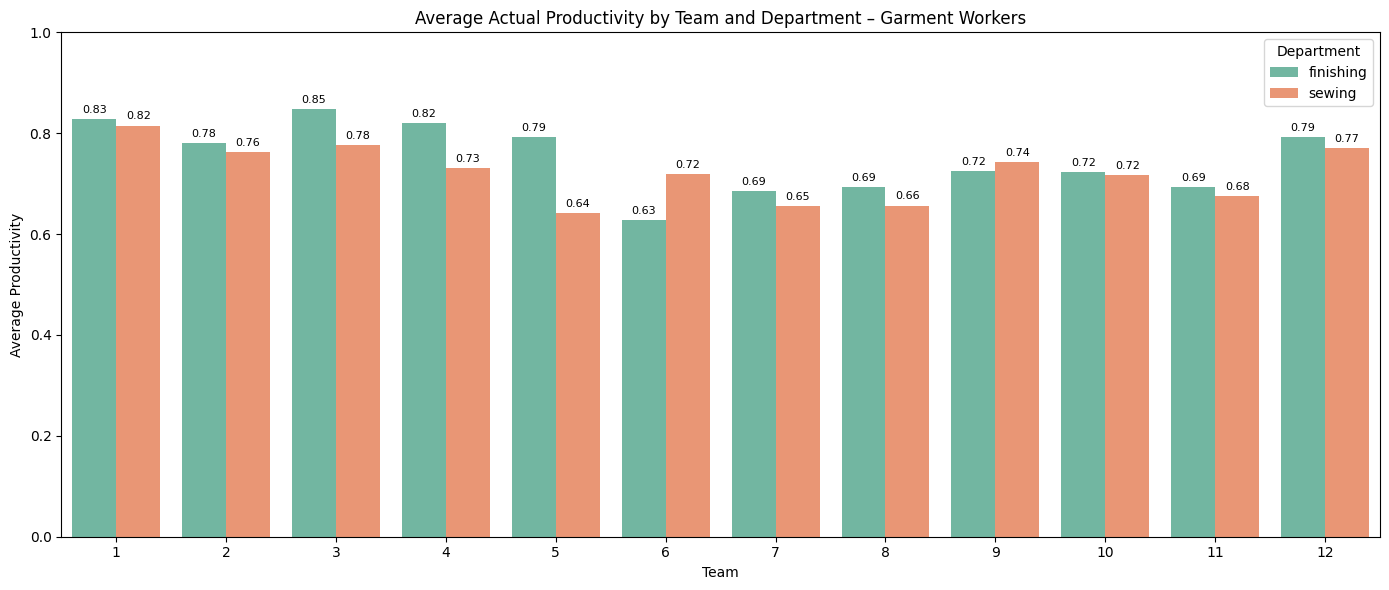

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by department and team, then calculate average productivity
team_avg = df.groupby(['department', 'team'], as_index=False)['actual_productivity'].mean()

# Plotting
plt.figure(figsize=(14, 6))
ax = sns.barplot(
    data=team_avg,
    x='team',
    y='actual_productivity',
    hue='department',
    palette='Set2'
)

# Titles and labels
plt.title('Average Actual Productivity by Team and Department – Garment Workers')
plt.xlabel('Team')
plt.ylabel('Average Productivity')
plt.ylim(0, 1)
plt.xticks(rotation=0)  # Keep team numbers horizontal
plt.legend(title='Department', loc='upper right')
plt.tight_layout()

# Add value labels on bars
for bar in ax.patches:
    height = bar.get_height()
    if not np.isnan(height) and height > 0:  # Avoid labeling bars that shouldn't be shown
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

plt.show()


### Team-Level Productivity 

To better understand team performance across departments, we calculate the **average actual productivity per team**. 

The grouped bar chart below shows how different teams perform within the `finishing` and `sewing` departments. We've also annotated each bar with its exact value to make comparison easier and more precise.


Text(0, 0.5, 'Actual Productivity')

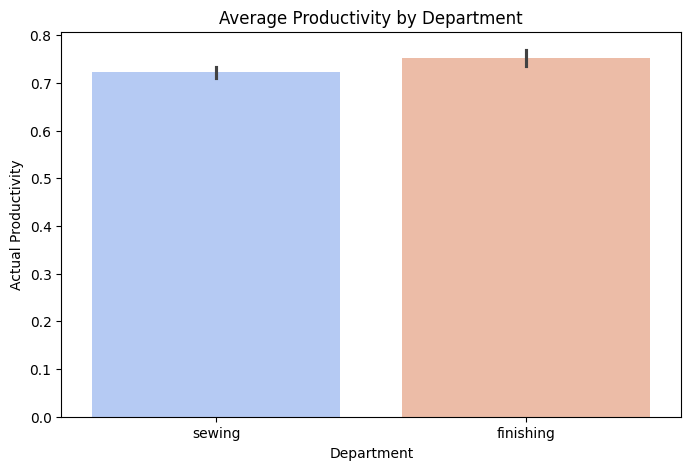

In [133]:
# Plot for Average 'Productivity' by 'Department'
plt.figure(figsize=(8,5))
sns.barplot(x=df['department'], y=df['actual_productivity'], estimator=np.mean, palette='coolwarm')
plt.title('Average Productivity by Department')
plt.xlabel('Department')
plt.ylabel('Actual Productivity')


### Average Productivity by Department

This plot compares the **average actual productivity** between the `sewing` and `finishing` departments. 

It provides a high-level view of departmental performance. Error bars are included to indicate variability or confidence in the average values.


### Targeted vs. Actual Productivity by Department

To evaluate how well each department meets its targets, we compare the **distribution of targeted and actual productivity** using boxplots.

([0, 1], [Text(0, 0, 'sewing'), Text(1, 0, 'finishing')])

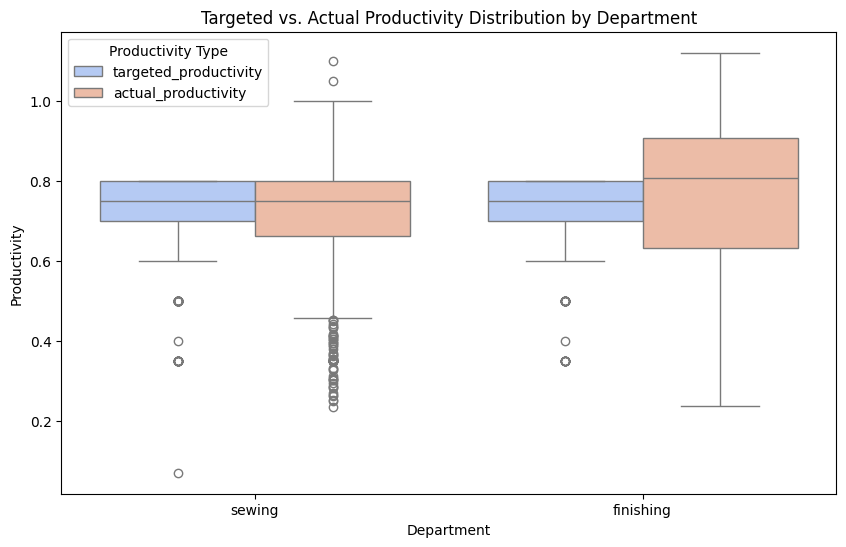

In [134]:
# Plot for 'Targeted' & 'Actual Productivity' Distribution by Department
plt.figure(figsize=(10,6))
df_melted = df.melt(id_vars=['department'], value_vars=['targeted_productivity', 'actual_productivity'], var_name="Type", value_name="Productivity")

sns.boxplot(x='department', y='Productivity', hue='Type', data=df_melted, palette='coolwarm')
plt.title("Targeted vs. Actual Productivity Distribution by Department")
plt.xlabel("Department")
plt.ylabel("Productivity")
plt.legend(title="Productivity Type")
plt.xticks(rotation=0)

### Comparing Targeted vs. Actual Productivity Distributions

This boxplot compares the distribution of **targeted** and **actual productivity** across departments.

- The boxes show the **interquartile range (IQR)** and median values.
- Dots outside the whiskers represent **outliers** — either exceptionally high or low productivity.
- This comparison helps us understand how closely teams are hitting their targets, and whether one department consistently outperforms or underperforms relative to expectations.


### Median incentive by overtime bin

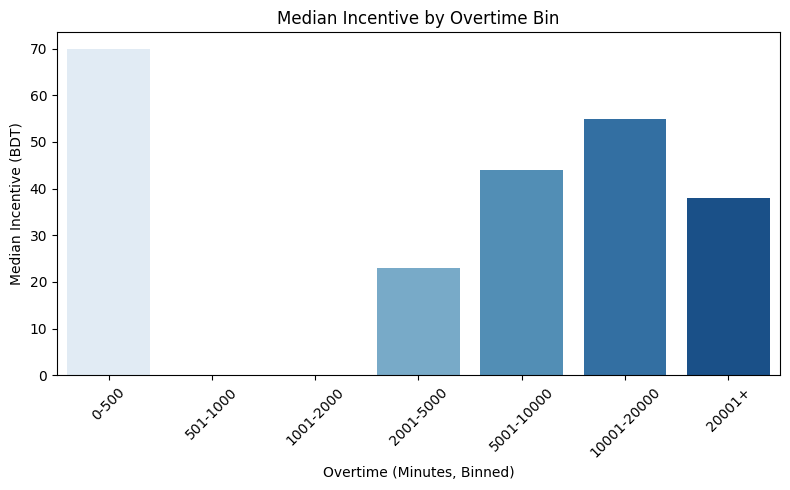

In [135]:
df['overtime_bin'] = pd.cut(
    df['over_time'],
    bins=[-1, 500, 1000, 2000, 5000, 10000, 20000, float('inf')],
    labels=['0-500', '501-1000', '1001-2000', '2001-5000', '5001-10000', '10001-20000', '20001+']
)

# Median incentive per overtime bin (robust to outliers)
incentive_median = df.groupby('overtime_bin')['incentive'].median().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=incentive_median, x='overtime_bin', y='incentive', palette='Blues')

plt.title('Median Incentive by Overtime Bin')
plt.xlabel('Overtime (Minutes, Binned)')
plt.ylabel('Median Incentive (BDT)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



###  Median Incentive by Overtime Bin

This bar chart shows the **median incentive** received by workers in each overtime range. 

By using the **median** instead of the mean, we reduce the impact of extreme values (outliers) and get a clearer picture of what a **typical worker** in each overtime group actually earns.

Key takeaways:
- Workers with **0–500 minutes** of overtime have the **highest typical incentive**, possibly due to high-efficiency or bonus structures.
- Incentives generally **increase with overtime**, peaking around `10001–20000` minutes.
- A slight **drop in the final bin** (`20001+`) may indicate diminishing returns or overwork not translating into proportional incentives.


### Model-Specific Feature Engineering

Not all models treat features the same way — particularly when it comes to **scale** and **categorical variables**.

In this function, we apply **model-aware preprocessing**:
- For models like **SVM, Perceptron, Linear Regression**:
  - We apply a **log transformation** to `wip` to reduce skew.
  - We use **cyclical encoding** for day of the week.
  - We apply **target encoding** to categorical variables.

- For **tree-based models** (e.g. Decision Trees):
  - No log transformation is applied (trees handle scale naturally).
  - We use **one-hot encoding** for `day`.
  - We use **label encoding** for `department` and `quarter`.

This setup ensures each model gets the features it understands best — improving both interpretability and performance.


In [136]:
def model_specific_encoding(df, model_type='svm'):
    df = df.copy()

    # Create day_num if needed
    if 'day_num' not in df.columns:
        df['day_num'] = df['date'].dt.weekday

    # Log-transform WIP for non-tree models
    if model_type in ['svm', 'perceptron', 'linear']:
        df['wip_log'] = np.log1p(df['wip'])
        df.drop(columns=['wip'], inplace=True)

    # Model-specific feature encoding
    if model_type in ['svm', 'perceptron', 'linear']:
        df['day_sin'] = np.sin(2 * np.pi * df['day_num'] / 7)
        df['day_cos'] = np.cos(2 * np.pi * df['day_num'] / 7)

        df['department_encoded'] = df['department'].map(df.groupby('department')['actual_productivity'].mean())
        df['team_encoded'] = df['team'].map(df.groupby('team')['actual_productivity'].mean())
        df['quarter_encoded'] = df['quarter'].map(df.groupby('quarter')['actual_productivity'].mean())

        df.drop(['day', 'department', 'team', 'quarter'], axis=1, inplace=True)

    elif model_type == 'decision_tree':
        df = pd.get_dummies(df, columns=['day'], drop_first=False)

        le = LabelEncoder()
        df['department_label'] = le.fit_transform(df['department'])
        df['quarter_label'] = le.fit_transform(df['quarter'])

        df.drop(['department', 'quarter'], axis=1, inplace=True)

    else:
        raise ValueError("Invalid model_type. Choose from 'svm', 'perceptron', 'linear', or 'decision_tree'.")

    return df



### Applying Model-Specific Preprocessing

Now that we've defined our flexible encoding function, we can preprocess our data depending on the model we're training.


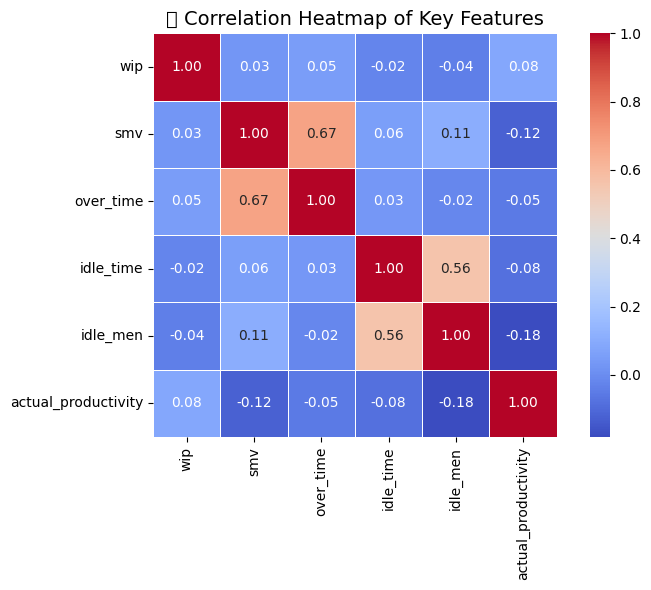

In [137]:
# Select numerical features for correlation (adjust 'wip' if you used 'wip_log')
features = ['wip', 'smv', 'over_time', 'idle_time','idle_men', 'actual_productivity']

# If you used log-transformed wip:
# features[0] = 'wip_log'

# Calculate correlation matrix
corr_matrix = df[features].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)
plt.title("🔗 Correlation Heatmap of Key Features", fontsize=14)
plt.tight_layout()
plt.show()


### Correlation Analysis

This heatmap reveals the linear relationships between selected numeric features and `actual_productivity`.

Key insights:
- None of the features show strong linear correlation with the target variable.
- `wip` has a slight positive relationship with productivity.
- `smv`, `over_time`, and `idle_time` show weak or negative correlations.
- This suggests that simple linear models may struggle, and more complex models (like decision trees or ensemble methods) may be better suited to capture non-linear interactions.


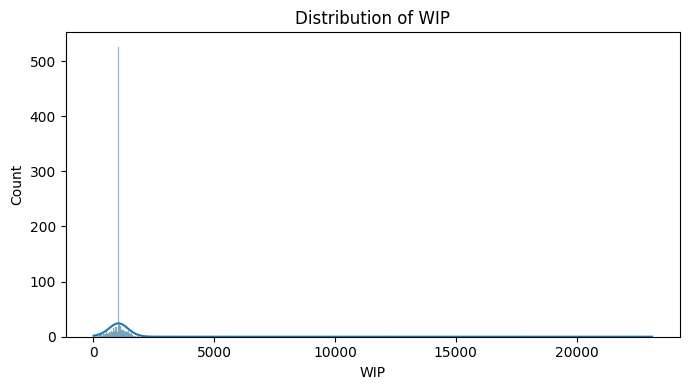

In [138]:
plt.figure(figsize=(7, 4))
sns.histplot(df['wip'], kde=True)
plt.title("Distribution of WIP")
plt.xlabel("WIP")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### Distribution of WIP (Work In Progress)

This histogram shows the distribution of `wip` (Work In Progress) values across all observations.

- The distribution is **highly right-skewed**, with a majority of values clustered near the lower end.
- A few large values act as **outliers**, which may influence models that are sensitive to scale.
- This insight supports the idea of using a **log transformation** (e.g., `wip_log`) to normalize the distribution and reduce the effect of extreme values.


In [139]:
df['wip_log'] = np.log1p(df['wip'])

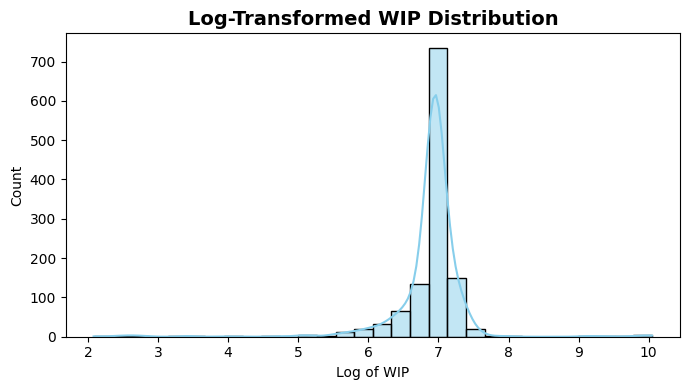

In [140]:
plt.figure(figsize=(7, 4))
sns.histplot(df['wip_log'], kde=True, color='skyblue', bins=30)
plt.title("Log-Transformed WIP Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Log of WIP")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### Result: Log Transformation Effectiveness

As shown above, the `wip_log` distribution is much more **centered and symmetrical** compared to the raw `wip` values.

This transformation helps:
- Reduce the impact of extreme values
- Normalize the scale for better performance in models like **SVMs** and **linear regression**
- Improve convergence and interpretability

We will use `wip_log` in our modeling workflow for all non-tree-based models.


After applying log transformation to the `wip` feature, the distribution becomes nearly symmetric and well-centered. This transformation reduces skewness and minimizes the impact of extreme outliers, making the data more suitable for regression models.


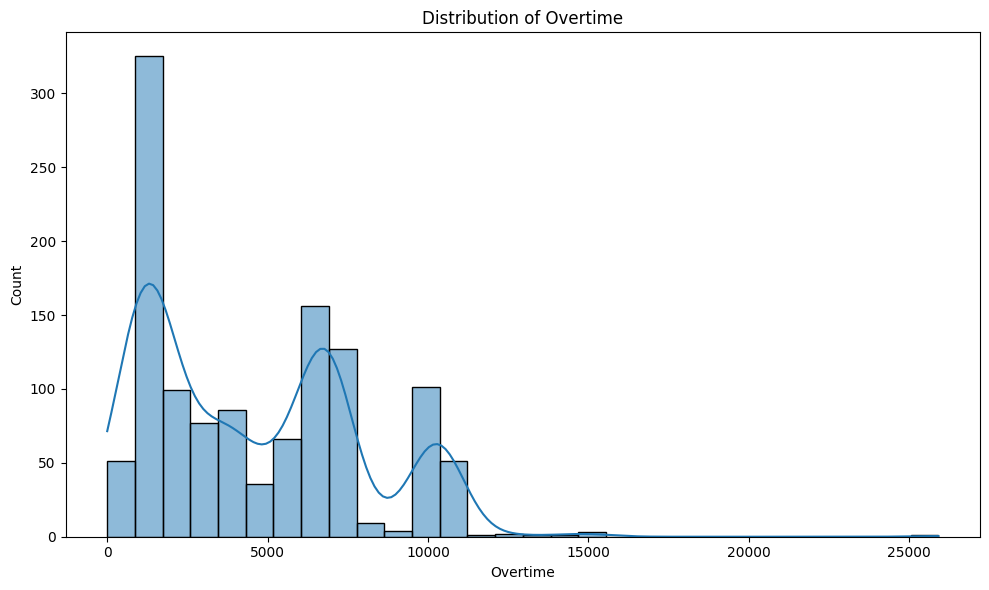

In [141]:
plt.figure(figsize=(10, 6))  
sns.histplot(df['over_time'], kde=True, bins=30)
plt.title('Distribution of Overtime')
plt.xlabel('Overtime')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


###  Distribution of Overtime

This histogram shows the distribution of `over_time` (minutes) across the dataset.

- The plot helps us identify whether overtime is normally distributed or skewed.
- It also allows us to detect outliers — such as workers with unusually high overtime — which may influence productivity or incentives.
- Depending on the shape, we may consider transformation (e.g., log) or binning for categorical treatment.


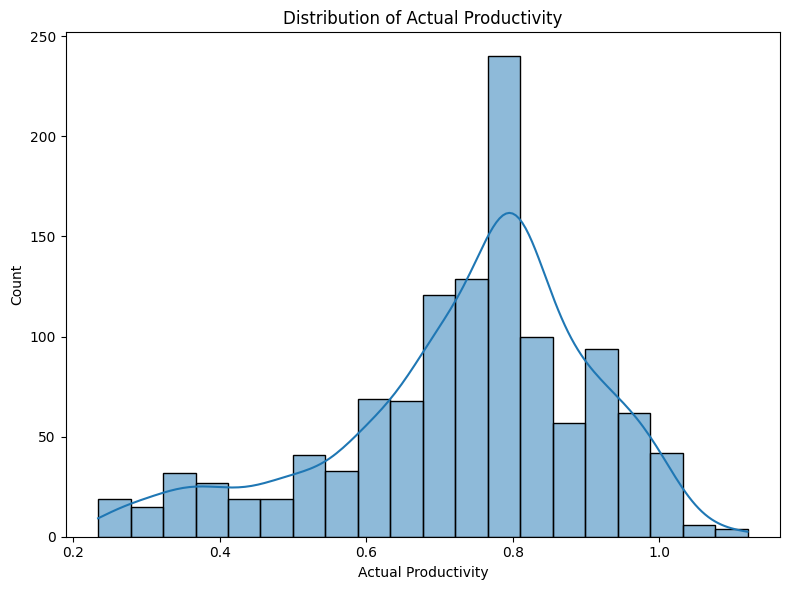

In [142]:
plt.figure(figsize=(8, 6))
sns.histplot(df['actual_productivity'], bins=20, kde=True)
plt.title("Distribution of Actual Productivity")  # You had it twice
plt.xlabel("Actual Productivity")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### Target Variable Distribution: `actual_productivity`

This plot shows the distribution of our target variable, `actual_productivity`.

Key observations:
- Most values lie between **0.6 and 1.0**, with a sharp peak around **0.8**.
- The distribution is **right-skewed**, with fewer examples in the lower productivity range.
- A small number of workers have very low productivity (< 0.4), which may reflect training periods, absenteeism, or underperformance.
- Values are clipped at **1.0**, consistent with earlier preprocessing.


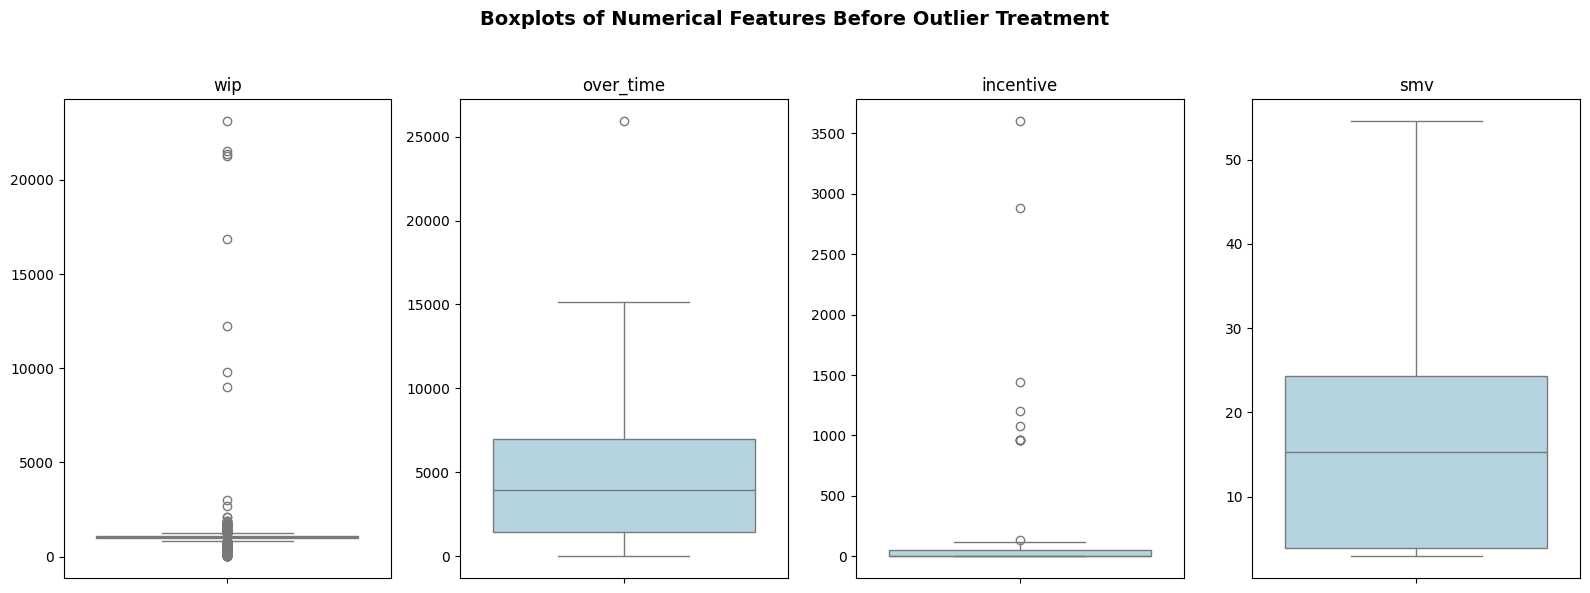

In [143]:
numerical_cols = ['wip', 'over_time', 'incentive', 'smv']

plt.figure(figsize=(16, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, len(numerical_cols), i)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(col)
    plt.ylabel('')  

plt.suptitle("Boxplots of Numerical Features Before Outlier Treatment", fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Boxplots of Numerical Features (Before Outlier Treatment)

The following boxplots help us visualize the distribution and presence of outliers across key numerical features.

- **`wip`**, **`over_time`**, and **`incentive`** show strong outliers with long upper tails.
- **`smv`** also displays a wider range, suggesting variability in task complexity.

These visuals support our decision to apply IQR-based outlier handling on selected features before modeling.




In [144]:
def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    if IQR == 0:
        print(f"Skipping '{column}' — no variability (IQR = 0)")
        return

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_value = df[column].median()

    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    count_outliers = outliers.sum()
    
    df[column] = np.where(outliers, median_value, df[column])
    
    print(f"{column}: Replaced {count_outliers} outlier(s) with median value {median_value:.2f}")



### 🛠 Outlier Treatment Using IQR Method

To reduce the influence of extreme values, we apply an **IQR-based outlier detection** and replace outliers with the **column's median**.

- This method is robust and preserves the central tendency of the feature.
- Outliers are defined as any value below `Q1 - 1.5*IQR` or above `Q3 + 1.5*IQR`.
- Replacing them with the median reduces variance without introducing artificial noise like mean imputation would.


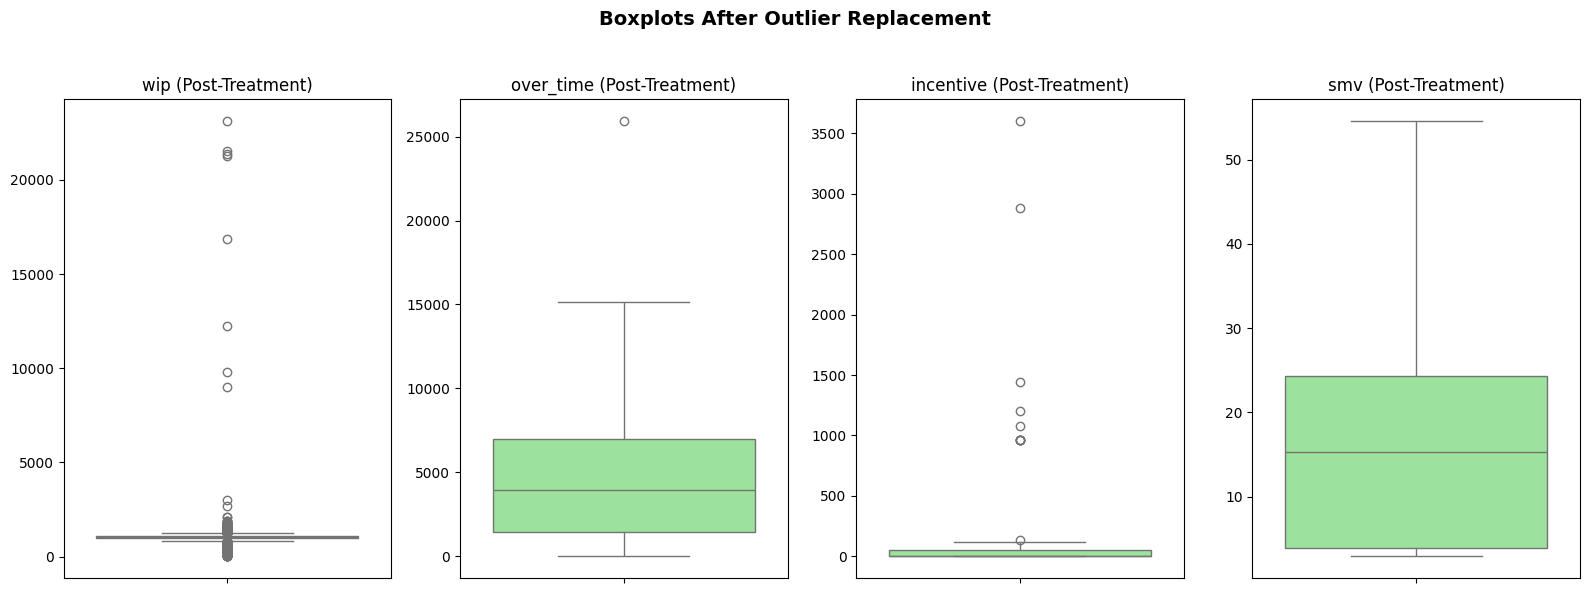

In [145]:
plt.figure(figsize=(16, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, len(numerical_cols), i)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f"{col} (Post-Treatment)")
    plt.ylabel('')

plt.suptitle("Boxplots After Outlier Replacement", fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Boxplot Analysis After Outlier Replacement

Following IQR-based median replacement, we re-examined the distribution of key numerical features to evaluate the effectiveness of our outlier treatment.

#### Observations:
- **`wip`**: Outlier treatment was effective for common extremes, but a few very large values (e.g., >20,000) still remain. This suggests those extreme values were not captured within the IQR thresholds and may need further review (possibly manual capping or custom logic).
- **`over_time`**: Moderate improvement, but a single extremely high value (~26,000) is still present. This is likely a true anomaly or entry error that was not replaced by the IQR method.
- **`incentive`**: Still shows extreme outliers, including values above 3,000 BDT. These few high earners might reflect actual bonus payouts — but if they’re distorting model performance, consider capping at a reasonable threshold (e.g., 99th percentile).
- **`smv`**: This feature appears reasonably well-behaved post-treatment. Outliers are expected here due to variation in task complexity and do not need aggressive handling.

#### Conclusion:
While median replacement improved the central distribution in most features, some extreme values remain because they fall just inside the IQR cutoff or represent real-world extremes. For modeling purposes:
- Keep the treated data for models that are sensitive to outliers.
- Use raw values (with optional capping) for tree-based models.


In [146]:
def clip_outliers(df, cols, lower=0.01, upper=0.99):
    for col in cols:
        low = df[col].quantile(lower)
        high = df[col].quantile(upper)
        df[col] = df[col].clip(lower=low, upper=high)
        print(f"{col}: Clipped to {low:.2f} - {high:.2f}")


### Outlier Capping with Percentile-Based Clipping

To reduce the impact of rare but extreme values, we applied percentile-based capping (1st and 99th percentile) to selected features:

- `over_time`: to handle extremely high work durations
- `incentive`: to tame unusually large bonuses
- `wip`: to smooth out high work-in-progress values

This approach preserves the structure of the data while reducing the influence of extreme values on models that are sensitive to scale.


In [147]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,overtime_bin,wip_log
0,2015-01-01,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,5001-10000,7.011214
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500,501-1000,6.946976
2,2015-01-01,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,2001-5000,6.876265
3,2015-01-01,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,2001-5000,6.876265
4,2015-01-01,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1001-2000,7.065613


In [148]:
df['idle_men'].value_counts()

idle_men
0     1179
10       3
15       3
30       3
20       3
35       2
37       1
45       1
25       1
40       1
Name: count, dtype: int64

In [149]:
df['idle_time'].value_counts()

idle_time
0.0      1179
3.5         3
2.0         2
8.0         2
4.0         2
4.5         2
5.0         2
90.0        1
270.0       1
150.0       1
300.0       1
6.5         1
Name: count, dtype: int64

### creating idle_men_ratio and idle_ratio, since these columns are too sparse

In [150]:
df['idle_men_ratio'] = df['idle_men'] / (df['no_of_workers'] + 1e-5)


In [151]:
# Create idle_ratio
df['idle_ratio'] = df['idle_time'] / (df['no_of_workers'] + 1e-5)

# Drop raw idle_time (sparse & less useful)
df.drop(columns='idle_time', inplace=True)


In [152]:
df.drop(columns='idle_men', inplace=True)

In [153]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,no_of_style_change,no_of_workers,actual_productivity,overtime_bin,wip_log,idle_men_ratio,idle_ratio
0,2015-01-01,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0,59.0,0.940725,5001-10000,7.011214,0.0,0.0
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,1039.0,960,0,0,8.0,0.886500,501-1000,6.946976,0.0,0.0
2,2015-01-01,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0,30.5,0.800570,2001-5000,6.876265,0.0,0.0
3,2015-01-01,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0,30.5,0.800570,2001-5000,6.876265,0.0,0.0
4,2015-01-01,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0,56.0,0.800382,1001-2000,7.065613,0.0,0.0


In [154]:
df.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
overtime_bin             0
wip_log                  0
idle_men_ratio           0
idle_ratio               0
dtype: int64

In [155]:
df_svm = model_specific_encoding(df, model_type='svm')
df_tree = model_specific_encoding(df, model_type='decision_tree')

# Add the target column back for export
df_svm['actual_productivity'] = df['actual_productivity']
df_tree['actual_productivity'] = df['actual_productivity']

# Export
df_svm.to_csv("svm_neuralnet_ready.csv", index=False)
df_tree.to_csv("tree_model_ready.csv", index=False)
